In [1]:
import Pkg
pkgs = [
    "Revise",
    "DataFrames",
    "StatsBase",
    "StatsPlots",
    "uCSV",
    "ProgressMeter",
    "Distances",
    "Clustering",
    "Colors",
    "MultivariateStats"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
import Mycelia

[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
data_dir = joinpath(dirname(pwd()), "data")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data"

In [3]:
sample_paths = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(joinpath(data_dir, "SRA"), join=true))

594-element Vector{String}:
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399459"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399460"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399461"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399462"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399463"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399464"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399465"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399466"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399467"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399468"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399469"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/

In [4]:
results_dir = joinpath(data_dir, "results")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results"

In [5]:
taxon_levels = Mycelia.list_ranks()

9-element Vector{String}:
 "top"
 "superkingdom"
 "kingdom"
 "phylum"
 "class"
 "order"
 "family"
 "genus"
 "species"

In [6]:
i = 9

(taxon_index, taxon_level) = collect(enumerate(taxon_levels))[i]
println("$(taxon_index) - $(taxon_level)")
rank_table = Mycelia.list_rank(taxon_level)

9 - species


Row,taxid,name
,Int64,String
1,46014,Plasmavirus L2
2,174676,unidentified Fusellovirus
3,244589,Sulfolobus spindle-shaped virus 1
4,244590,Sulfolobus spindle-shaped virus 2
5,459290,Sulfolobus spindle-shaped virus 4
6,459291,Sulfolobus spindle-shaped virus 5
7,693628,Sulfolobus spindle-shaped virus 7
8,2032563,Sulfolobus spindle-shaped virus 8
9,2032573,Sulfolobus spindle-shaped virus 9


In [ ]:
# NCBI host metadata
ncbi_metadata_file = joinpath(dirname(pwd()), "metadata", "NCBI-virus-refseq.transformed.tsv")
ncbi_host_metadata = DataFrames.DataFrame(uCSV.read(ncbi_metadata_file, header=1, delim='\t', encodings=Dict("false" => false, "true" => true)))

# ICTV host metadata
ictv_metadata_file = joinpath(dirname(pwd()), "metadata", "VMR_MSL38_v1 - VMR MSL38 v1.transformed.tsv")
ictv_host_metadata = DataFrames.DataFrame(uCSV.read(ictv_metadata_file, header=1, delim='\t', typedetectrows=100))
ictv_host_metadata = ictv_host_metadata[.!isempty.(ictv_host_metadata[!, "taxid"]), :]
ictv_host_metadata[!, "taxid"] = parse.(Int, ictv_host_metadata[!, "taxid"])

# # VirusHostDB metadata
virushostdb_metadata_file = joinpath(dirname(pwd()), "metadata", "virushostdb.transformed.tsv")
virushostdb_metadata = DataFrames.DataFrame(uCSV.read(virushostdb_metadata_file, header=1, delim='\t', typedetectrows=1086, encodings=Dict("missing" => missing, "false" => false, "true" => true)))

# vertebrate_taxids = Set(union(
#     ictv_host_metadata[ictv_host_metadata[!, "Host source"] .== "vertebrates", "taxid"],
#     ncbi_host_metadata[ncbi_host_metadata[!, "host_is_vertebrate"], "taxid"],
#     virushostdb_metadata[virushostdb_metadata[!, "host_is_vertebrate"], "virus_taxid"]
# ))

# human_taxids = Set(union(
#     ncbi_host_metadata[ncbi_host_metadata[!, "host_is_human"], "taxid"],
#     virushostdb_metadata[virushostdb_metadata[!, "host_is_human"], "virus_taxid"]
# ))

In [ ]:
# get a list of all viral taxids across the databases

In [14]:
filtered_tax_ids = Set(ictv_host_metadata[!, "taxid"])
filtered_rank_table = rank_table[map(taxid -> taxid in filtered_tax_ids, rank_table[!, "taxid"]), :]

Row,taxid,name
,Int64,String
1,46014,Plasmavirus L2
2,244589,Sulfolobus spindle-shaped virus 1
3,244590,Sulfolobus spindle-shaped virus 2
4,459290,Sulfolobus spindle-shaped virus 4
5,459291,Sulfolobus spindle-shaped virus 5
6,693628,Sulfolobus spindle-shaped virus 7
7,2032563,Sulfolobus spindle-shaped virus 8
8,2032573,Sulfolobus spindle-shaped virus 9
9,693627,Sulfolobus spindle-shaped virus 6


In [15]:
# println("$(taxon_index) - $(taxon_level)")
# rank_table = Mycelia.list_rank(taxon_level)
rank_taxids = Set(filtered_rank_table[!, "taxid"])

Set{Int64} with 9923 elements:
  2843922
  2956278
  2734260
  60876
  2844001
  2843637
  3052147
  41459
  2844442
  322019
  1239579
  2734347
  2560275
  3052551
  2846114
  2560293
  2732701
  1568974
  579113
  2169747
  134599
  2845759
  1982276
  2955497
  2846084
  ⋮ 

In [16]:
kraken_db = "k2_pluspfp"
kraken_db_regex = Regex("$(kraken_db)_\\d{8}")

r"k2_pluspfp_\d{8}"

In [19]:
cross_sample_taxon_report = joinpath(results_dir, "$(kraken_db).$(taxon_level).ictv.tsv")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results/k2_pluspfp.species.ictv.tsv"

In [20]:
cross_sample_taxon_figure_png = joinpath(results_dir, "$(kraken_db).$(taxon_level).ictv.png")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results/k2_pluspfp.species.ictv.png"

In [ ]:
exposome_kraken_reports = map(path ->
    first(filter(x -> occursin(kraken_db_regex, x) && occursin(r"kraken-report\.tsv$", x), readdir(joinpath(path, "kraken"), join=true))),
    sample_paths)
kraken_dirs = filter(x -> occursin(r"Kraken2", x), readdir(joinpath(data_dir, "ultimagen-snyder"), join=true))
ultima_kraken_reports = reduce(vcat, [readdir(kraken_dir, join=true) for kraken_dir in kraken_dirs])
ipop_kraken_reports = readdir(joinpath(data_dir, "ultimagen-snyder/ipop/kraken2"), join=true)
joint_kraken_reports = vcat(exposome_kraken_reports, ultima_kraken_reports, ipop_kraken_reports)

In [ ]:
for x in basename.(joint_kraken_reports)
    println(x)
end

In [51]:
cross_sample_taxon_report_table = DataFrames.DataFrame()
# sample_path = first(sample_paths)
ProgressMeter.@showprogress for kraken_report in joint_kraken_reports
    report_table = Mycelia.read_kraken_report(kraken_report)
    taxon_level_report = report_table[map(x -> x in rank_taxids, report_table[!, "ncbi_taxonid"]), :]
    taxon_level_report[!, "sample_identifier"] .= basename(kraken_report)
    append!(cross_sample_taxon_report_table, taxon_level_report)
end
cross_sample_taxon_report_summary = cross_sample_taxon_report_table[!, DataFrames.Not(["percentage_of_fragments_at_or_below_taxon", "number_of_fragments_assigned_directly_to_taxon", "rank"])]
# uCSV.write(cross_sample_taxon_report, cross_sample_taxon_report_table, delim='\t')

Progress: 100%|█████████████████████████████████████████| Time: 0:05:20


Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier
,Int64,Int64,String,String
1,23,1986034,Gequatrovirus G4,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
2,22,1910969,Gequatrovirus talmos,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
3,8,1910968,Gequatrovirus ID52,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
4,7,1945586,Alphatrevirus NC29,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
5,6,1945584,Alphatrevirus ID21,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
6,4,1945589,Alphatrevirus alpha3,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
7,3,1945588,Alphatrevirus ID62,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
8,2,1945582,Alphatrevirus WA45,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
9,2,1945585,Alphatrevirus NC28,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv


In [52]:
cross_sample_taxon_report_summary[!, "taxon"] = map(row -> string(row["ncbi_taxonid"]) * "_" * row["scientific_name"], DataFrames.eachrow(cross_sample_taxon_report_summary))
# cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[!, DataFrames.Not([
#             "ncbi_taxonid",
#             "scientific_name"
#         ])]

9770784-element Vector{String}:
 "1986034_Gequatrovirus G4"
 "1910969_Gequatrovirus talmos"
 "1910968_Gequatrovirus ID52"
 "1945586_Alphatrevirus NC29"
 "1945584_Alphatrevirus ID21"
 "1945589_Alphatrevirus alpha3"
 "1945588_Alphatrevirus ID62"
 "1945582_Alphatrevirus WA45"
 "1945585_Alphatrevirus NC28"
 "1985284_Alphatrevirus St1"
 "10848_Alphatrevirus phiK"
 "1945583_Alphatrevirus NC35"
 "1945587_Alphatrevirus ID32"
 ⋮
 "192027_Coleus blumei viroid 3"
 "2955713_Coleviroid cbvd-5"
 "2955714_Coleviroid cbvd-6"
 "244589_Sulfolobus spindle-shaped virus 1"
 "244590_Sulfolobus spindle-shaped virus 2"
 "459290_Sulfolobus spindle-shaped virus 4"
 "459291_Sulfolobus spindle-shaped virus 5"
 "693628_Sulfolobus spindle-shaped virus 7"
 "2032563_Sulfolobus spindle-shaped virus 8"
 "2032573_Sulfolobus spindle-shaped virus 9"
 "693627_Sulfolobus spindle-shaped virus 6"
 "693629_Acidianus spindle-shaped virus 1"

In [53]:
# assert sortedness & uniqueness (should be a no-op)
unique!(DataFrames.sort!(cross_sample_taxon_report_summary, ["sample_identifier", "taxon"]))

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,0,1000373,Rosellinia necatrix quadrivirus 1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1000373_Rosellinia necatrix quadrivirus 1
2,0,1001341,Vernonia yellow vein Fujian virus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1001341_Vernonia yellow vein Fujian virus
3,0,100217,Epizootic haematopoietic necrosis virus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,100217_Epizootic haematopoietic necrosis virus
4,0,1002681,Sida golden mosaic Lara virus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1002681_Sida golden mosaic Lara virus
5,0,1002724,Tunavirus Shfl1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1002724_Tunavirus Shfl1
6,0,1003836,Pepper leaf curl Yunnan virus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1003836_Pepper leaf curl Yunnan virus
7,0,1003891,Hardenbergia virus A,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1003891_Hardenbergia virus A
8,0,1005056,Chivirus iEPS5,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1005056_Chivirus iEPS5
9,0,1006972,Campylobacter virus IBB35,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1006972_Campylobacter virus IBB35


In [57]:
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"] .> 0, :]

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,1,10683,Takahashivirus PBS1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,10683_Takahashivirus PBS1
2,1,1179664,Mythimna separata entomopoxvirus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1179664_Mythimna separata entomopoxvirus
3,2,1982256,Pahexavirus kubed,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982256_Pahexavirus kubed
4,6,1982584,Cepunavirus Cp1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982584_Cepunavirus Cp1
5,4,1982585,Cepunavirus Cp7,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982585_Cepunavirus Cp7
6,1,1986015,Okubovirus camphawk,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1986015_Okubovirus camphawk
7,1,2169814,Hubei chipolycivirus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2169814_Hubei chipolycivirus
8,1,2560422,Schiekvirus EFDG1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2560422_Schiekvirus EFDG1
9,1,2560488,Vividuovirus brandonk123,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2560488_Vividuovirus brandonk123


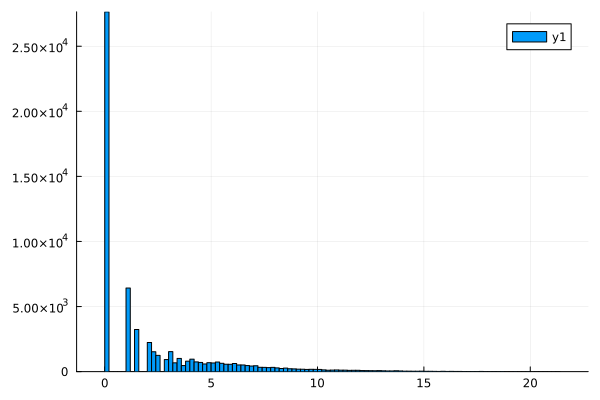

In [59]:
StatsPlots.histogram(log2.(cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"]))

In [62]:
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"] .>= 3, :]

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,6,1982584,Cepunavirus Cp1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982584_Cepunavirus Cp1
2,4,1982585,Cepunavirus Cp7,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982585_Cepunavirus Cp7
3,30,2734096,Brigitvirus brigit,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734096_Brigitvirus brigit
4,4,2734146,Taranisvirus taranis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734146_Taranisvirus taranis
5,58,2734150,Toutatisvirus toutatis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734150_Toutatisvirus toutatis
6,17,2734262,Oengusvirus oengus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734262_Oengusvirus oengus
7,5,2843625,Moturavirus motura,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2843625_Moturavirus motura
8,3,2844309,Latrobevirus FNU1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2844309_Latrobevirus FNU1
9,158,2955578,Canhaevirus faecalis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2955578_Canhaevirus faecalis


In [68]:
taxon_report_summary_with_host_info = DataFrames.innerjoin(
    cross_sample_taxon_report_summary,
    ictv_host_metadata,
    on="ncbi_taxonid" => "taxid")

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon,Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Subclass,Order,Suborder,Family,Subfamily,Genus,Subgenus,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Virus REFSEQ accession,Genome coverage,Genome composition,Host source
,Int64,Int64,String,String,String,Int64,Int64,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String
1,6,1982584,Cepunavirus Cp1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982584_Cepunavirus Cp1,1570,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,Salasmaviridae,,Cepunavirus,,Cepunavirus Cp1,E,Streptococcus phage Cp1,,,Z47794,NC_001825,Complete genome,dsDNA,bacteria
2,4,1982585,Cepunavirus Cp7,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,1982585_Cepunavirus Cp7,1571,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,Salasmaviridae,,Cepunavirus,,Cepunavirus Cp7,E,Streptococcus phage Cp-7,,,LK392619,NC_042114,Complete genome,dsDNA,bacteria
3,30,2734096,Brigitvirus brigit,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734096_Brigitvirus brigit,2892,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Brigitvirus,,Brigitvirus brigit,E,Faecalibacterium phage FP_Brigit,,,MG711465,NC_047909,Complete genome,dsDNA,bacteria
4,4,2734146,Taranisvirus taranis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734146_Taranisvirus taranis,4094,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Taranisvirus,,Taranisvirus taranis,E,Faecalibacterium phage FP_Taranis,,,MG711467,NC_047914,Complete genome,dsDNA,bacteria
5,58,2734150,Toutatisvirus toutatis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734150_Toutatisvirus toutatis,4115,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Toutatisvirus,,Toutatisvirus toutatis,E,Faecalibacterium phage FP_Toutatis,,,MG711466,NC_047915,Complete genome,dsDNA,bacteria
6,17,2734262,Oengusvirus oengus,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2734262_Oengusvirus oengus,3615,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Oengusvirus,,Oengusvirus oengus,E,Faecalibacterium phage FP_Oengus,,,MG711463,NC_047916,Complete genome,dsDNA,bacteria
7,5,2843625,Moturavirus motura,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2843625_Moturavirus motura,3547,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Moturavirus,,Moturavirus motura,E,Achromobacter phage Motura,,,MN094788,NC_049849,Complete genome,dsDNA,bacteria
8,3,2844309,Latrobevirus FNU1,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2844309_Latrobevirus FNU1,3430,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,,,,,Latrobevirus,,Latrobevirus FNU1,E,Fusobacterium phage FNU1,,,MK554696,NC_055035,Complete genome,dsDNA,bacteria
9,158,2955578,Canhaevirus faecalis,030809-ab_antarctica_1_microbiome-11-2C-BH2-Z0011-CACGCACTGCCAGAT.fastq.gz.k2_report,2955578_Canhaevirus faecalis,206,1,Duplodnaviria,,Heunggongvirae,,Uroviricota,,Caudoviricetes,,Crassvirales,,Suoliviridae,Boorivirinae,Canhaevirus,,Canhaevirus faecalis,E,uncultured phage cr77_1,,,MZ130482,,Complete genome,dsDNA,bacteria


In [70]:
hosts = sort(unique(taxon_report_summary_with_host_info[!, "Host source"]))
host_map = Dict(host => i for (i, host) in enumerate(hosts))
samples = sort(unique(taxon_report_summary_with_host_info[!, "sample_identifier"]))
samples_map = Dict(sample => i for (i, sample) in enumerate(samples))
values = zeros(length(samples), length(hosts))
ProgressMeter.@showprogress for host_table in DataFrames.groupby(taxon_report_summary_with_host_info, "Host source")
    host = host_table[1, "Host source"]
    column_index = host_map[host]
    for sample_table in DataFrames.groupby(host_table, "sample_identifier")
        sample = sample_table[1, "sample_identifier"]
        row_index = samples_map[sample]
        value = sum(sample_table[!, "number_of_fragments_at_or_below_taxon"])
        values[row_index, column_index] = value
    end
end
values

# sort group so largest single sample group is first
frequency_ordering = sortperm(maximum.(eachcol(values)))
values = values[:, frequency_ordering]
hosts = hosts[frequency_ordering]
# find taxa that have no representation, and filter them out
host_is_detected = [sum(col) >= 3 for col in eachcol(values)]
values = values[:, host_is_detected]
hosts = hosts[host_is_detected]

sample_has_classifications = [sum(row) > 0 for row in eachrow(values)]
values = values[sample_has_classifications, :]
samples = samples[sample_has_classifications]
hosts

13-element Vector{String}:
 "marine (S)"
 "archaea"
 "invertebrates, plants"
 "protists"
 "plants (S)"
 "fungi"
 "invertebrates, vertebrates"
 "algae"
 "sewage (S)"
 "plants"
 "invertebrates"
 "bacteria"
 "vertebrates"

In [71]:
colorscheme = Colors.distinguishable_colors(length(hosts), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)

In [72]:
normalized_values = values ./ sum(values, dims=2)

1087×13 Matrix{Float64}:
 0.0  0.0          0.0  0.0         0.0  …  1.0         0.0
 0.0  0.0          0.0  0.0         0.0     0.99711     0.00160565
 0.0  0.0          0.0  0.0         0.0     0.999823    0.0
 0.0  0.0          0.0  0.0         0.0     1.0         0.0
 0.0  0.0          0.0  0.0         0.0     0.998766    0.000617093
 0.0  0.0          0.0  0.0         0.0  …  1.0         0.0
 0.0  0.0          0.0  0.0         0.0     1.0         0.0
 0.0  0.0          0.0  0.0         0.0     0.999546    0.0
 0.0  0.0          0.0  0.0         0.0     1.0         0.0
 0.0  0.0          0.0  3.79936e-5  0.0     0.999962    0.0
 0.0  0.0          0.0  0.0         0.0  …  1.0         0.0
 0.0  0.0          0.0  0.0         0.0     1.0         0.0
 0.0  0.0          0.0  0.0         0.0     1.0         0.0
 ⋮                                       ⋱              
 0.0  0.0          0.0  0.0         0.0  …  0.459256    0.374634
 0.0  0.000286424  0.0  0.0         0.0     0.00372351  0.

In [ ]:
distance_matrix = Distances.pairwise(Distances.Euclidean(), normalized_values, dims=1)
clustering = Clustering.hclust(distance_matrix, branchorder=:optimal)

In [ ]:
bottommargin = (maximum(length.(samples)) * 5)
leftmargin = 150
rightmargin = 25
topmargin = 25

width = max(1920, (length(samples) * 10) + 300)
height = max(1080, bottommargin + 600)
height = max(height, length(hosts)*11)

plot = StatsPlots.groupedbar(
    log10.(values),
    title = "read-classification - kraken - $(kraken_db) - $(taxon_level)",
    titlefontsize = 12,
    xticks = (1:length(samples), samples),
    xlims = (0, length(samples)+1),
    xtickfontsize = 6,
    size= (width, height),
    xrotation=90,
    ylabel = "log10(number of reads)",
    labels = hcat(hosts...),
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
    legendmargins = 0,
    legend = :outertopright,
    legendfontsize = 6,
    bar_position = :stack,
    bar_width=0.7,
    seriescolor = hcat(reverse(colorscheme)...),
)
# display(plot)
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).by-host.ictv.total-reads") * extension
    StatsPlots.savefig(plot, file)
end

In [75]:
plot = StatsPlots.groupedbar(
    normalized_values,
    title = "read-classification - kraken - $(kraken_db) - $(taxon_level)",
    titlefontsize = 12,
    xticks = (1:length(samples), samples),
    xlims = (0, length(samples)+1),
    xtickfontsize = 6,
    size= (width, height),
    xrotation=90,
    ylabel = "proportion of reads",
    labels = hcat(hosts...),
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
    legendmargins = 0,
    legend = :outertopright,
    bar_position = :stack,
    bar_width=0.7,
    seriescolor = hcat(reverse(colorscheme)...),
    legendfontsize = 6,
)

# for extension in [".png", ".svg"]
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).by-host.ictv.normalized-reads") * extension
    StatsPlots.savefig(plot, file)
end

In [76]:
################################################################################################
distance_matrix = Distances.pairwise(Distances.Euclidean(), normalized_values, dims=1)
clustering = Clustering.hclust(distance_matrix, branchorder=:optimal)
cluster_plot = StatsPlots.plot(
    clustering,
    xlims = (0, length(samples)+1),
    title = "read-classification - kraken - $(kraken_db) - $(taxon_level)",
    titlefontsize = 12,
    bottommargin = 0StatsPlots.Plots.PlotMeasures.px,
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
    xticks = false,
    yticks = false,
    yaxis = false,
    xaxis = false
)
taxonomy_plot = StatsPlots.groupedbar(
    normalized_values[clustering.order, :],
    bar_position = :stack,
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = 0StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
    legendmargins = 0,
    xticks = (1:length(samples), samples[clustering.order]),
    xtickfontsize = 4,
    xrotation=90,
    xlims = (0, length(samples)+1),
    size= (width, height),
    ylabel = "proportion of reads",
    seriescolor = hcat(reverse(colorscheme)...),
    legend = false,
    labels = hcat(hosts...),
    legendfontsize = 6,
)

plot = StatsPlots.plot(
    cluster_plot,
    taxonomy_plot,
    margins = 0StatsPlots.Plots.PlotMeasures.px,
    layout=StatsPlots.grid(2,1, heights=[0.2,0.8])
)
# # display(plot)
# # for extension in [".png", ".svg"]
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).normalized-reads.by-host.ictv.clustered") * extension
    StatsPlots.savefig(plot, file)
end

In [120]:
# result = 2
# Mycelia.fit_optimal_number_of_clusters(distance_matrix)
# clustering_assignments = Clustering.cutree(clustering, k=2)
clustering_assignments = Clustering.kmeans(distance_matrix, 2).assignments
# to skip clustering
# clustering_assignments = ones(Int, size(distance_matrix, 1))

1087-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 2
 1
 1
 2
 2
 2
 1

In [125]:
# sample_groups = [String[], String[]]
# for (cluster, sample) in zip(clustering_assignments, samples)
#     push!(sample_groups[cluster], sample)
# end
# sample_groups

In [126]:
StatsPlots.plotly()

Plots.PlotlyBackend()

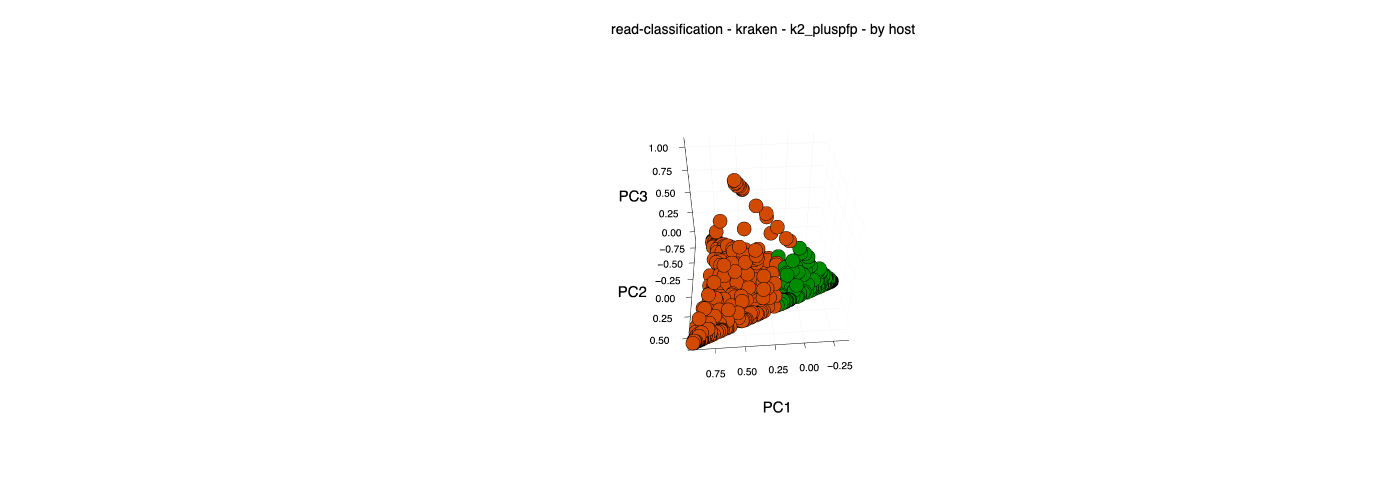

In [127]:
fit_pca = MultivariateStats.fit(MultivariateStats.PCA, normalized_values')
transformed_observations = MultivariateStats.transform(fit_pca, normalized_values')

top_level_groups = unique(clustering_assignments)
# Colors.RGB(0,0,0), Colors.RGB(0.78, 0.129, 0.867)
colorscheme = Colors.distinguishable_colors(length(top_level_groups), [Colors.RGB(1,1,1), Colors.RGB(0,0,0), Colors.RGB(0.78, 0.129, 0.867)], dropseed=true)
xs = [Float64[] for group in top_level_groups]
ys = [Float64[] for group in top_level_groups]
zs = [Float64[] for group in top_level_groups]

raw_xs = transformed_observations[1, :]
if size(transformed_observations, 1) >= 2
    raw_ys = transformed_observations[2, :]
else
    raw_ys = zeros(length(raw_xs))
end

if size(transformed_observations, 1) >= 3
    raw_zs = transformed_observations[3, :]
else
    raw_zs = zeros(length(raw_xs))
end

for (i, (x, y, z)) in enumerate(zip(raw_xs, raw_ys, raw_zs))
    # @show sample, x, y
    # sample_groups = findall(x -> occursin(x, sample), top_level_groups)
    # @assert length(sample_groups) == 1
    # sample_group = first(sample_groups)
    
    push!(xs[clustering_assignments[i]], x)
    push!(ys[clustering_assignments[i]], y)
    push!(zs[clustering_assignments[i]], z)
end

plot = 
StatsPlots.scatter(
    xs,
    ys,
    zs,
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3",
    # labels = hcat(top_level_groups...),
    title = "read-classification - kraken - $(kraken_db) - by host",
    titlefontsize = 10,
    # legend = :outertopright,
    legend = false,
    size = (640, 480),
    margins = 20StatsPlots.px,
    seriescolor = hcat(colorscheme...)
)

display(plot)
# for extension in [".png"]
#     file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).pca") * extension
#     StatsPlots.savefig(plot, file)
# end

In [ ]:
fit_pca = MultivariateStats.fit(MultivariateStats.PCA, normalized_values')
transformed_observations = MultivariateStats.transform(fit_pca, normalized_values')

top_level_groups = unique(clustering_assignments)
# Colors.RGB(0,0,0), Colors.RGB(0.78, 0.129, 0.867)
colorscheme = Colors.distinguishable_colors(length(top_level_groups), [Colors.RGB(1,1,1), Colors.RGB(0,0,0), Colors.RGB(0.78, 0.129, 0.867)], dropseed=true)
xs = [Float64[] for group in top_level_groups]
ys = [Float64[] for group in top_level_groups]
zs = [Float64[] for group in top_level_groups]

raw_xs = transformed_observations[1, :]
if size(transformed_observations, 1) >= 2
    raw_ys = transformed_observations[2, :]
else
    raw_ys = zeros(length(raw_xs))
end

if size(transformed_observations, 1) >= 3
    raw_zs = transformed_observations[3, :]
else
    raw_zs = zeros(length(raw_xs))
end

for (i, (x, y, z)) in enumerate(zip(raw_xs, raw_ys, raw_zs))
    # @show sample, x, y
    # sample_groups = findall(x -> occursin(x, sample), top_level_groups)
    # @assert length(sample_groups) == 1
    # sample_group = first(sample_groups)
    
    push!(xs[clustering_assignments[i]], x)
    push!(ys[clustering_assignments[i]], y)
    push!(zs[clustering_assignments[i]], z)
end

plot = 
StatsPlots.scatter(
    xs,
    ys,
    zs,
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3",
    # labels = hcat(top_level_groups...),
    title = "read-classification - kraken - $(kraken_db) - by host",
    titlefontsize = 10,
    # legend = :outertopright,
    legend = false,
    size = (640, 480),
    margins = 20StatsPlots.px,
    seriescolor = hcat(colorscheme...)
)

display(plot)
# for extension in [".png"]
#     file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).pca") * extension
#     StatsPlots.savefig(plot, file)
# end

In [ ]:
# # need to tune this to be proportional to the # of taxa in the list
# aspect_ratio = [9, 40]
# scale = 500
# plot = StatsPlots.groupedbar(
#     normalized_values,
#     title = "read-classification - $(taxon_level)",
#     xticks = (1:length(samples), samples),
#     xlims = (0, length(samples)+1),
#     xtickfontsize = 6,
#     size= aspect_ratio .* scale,
#     xrotation=90,
#     ylabel = "proportion of reads",
#     labels = hcat(taxa...),
#     margins = 100StatsPlots.Plots.PlotMeasures.px,
#     legend = :outertopright,
#     bar_position = :stack,
#     bar_width=0.7,
#     seriescolor = hcat(reverse(colorscheme)...),
#     legendfontsize = 6,
# )

# for extension in [".png", ".svg"]
#     file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(taxon_index).$(taxon_level).normalized-reads") * extension
#     StatsPlots.savefig(plot, file)
# end

In [ ]:
# aspect_ratio = [2, 1]
# scale = 1000

# cluster_plot = StatsPlots.plot(
#     clustering,
#     xlims = (1, length(samples)),
#     title = "read-classification - $(taxon_level)",
#     xticks = false,
#     yticks = false,
#     yaxis = false
# )
# taxonomy_plot = StatsPlots.groupedbar(
#     normalized_values[clustering.order, :],
#     bar_position = :stack,
#     bottommargin = 50StatsPlots.Plots.PlotMeasures.px,
#     leftmargin = 50StatsPlots.Plots.PlotMeasures.px,
#     xticks = (1:length(samples), samples[clustering.order]),
#     xtickfontsize = 4,
#     xrotation=90,
#     xlims = (0, length(samples)+1),
#     size= aspect_ratio .* scale,
#     ylabel = "proportion of reads",
#     seriescolor = hcat(reverse(colorscheme)...),
#     # bar_width=0.7,
#     legend = false,
#     labels = hcat(taxa...),
#     legendfontsize = 6,
# )

# # Create a separate subplot as a legend
# # legend_plot = StatsPlots.groupedbar(normalized_values[clustering.order, :], legend=true)
# # plot!(legend_subplot, label="Series 1", legend=:best, linecolor=1)
# # plot!(legend_subplot, label="Series 2", legend=:best, linecolor=2)

# # Layout the main plot and the legend subplot
# # l = @layout [a{0.7w}; b{0.3w}]
# # plot(p, legend_subplot, layout=l)

# plot = StatsPlots.plot(
#     cluster_plot, 
#     taxonomy_plot,
#     layout=StatsPlots.grid(2,1, heights=[0.2,0.8])
# )
# # display(plot)
# for extension in [".png", ".svg"]
#     file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(taxon_index).$(taxon_level).normalized-reads.clustered") * extension
#     StatsPlots.savefig(plot, file)
# end
# # end

In [ ]:
# for g in DataFrames.groupby(cross_sample_taxon_report_table, "sample_identifier")
#     # @show sum(g[!, "percentage_of_fragments_at_or_below_taxon"])
#     if sum(g[!, "percentage_of_fragments_at_or_below_taxon"]) == 100
#     else
#         identifier = g[1, "sample_identifier"]
#         println("\"$(identifier)\",")
#     end
# end

In [ ]:
# [number_of_fragments_at_or_below_taxon	ncbi_taxonid	scientific_name	sample_identifier

In [ ]:

# Mycelia.list_rank("kingdom")
# Mycelia.list_rank("phylum")
# Mycelia.list_rank("class")
# Mycelia.list_rank("order")
# Mycelia.list_rank("family")
# Mycelia.list_rank("genus")
# Mycelia.list_rank("species")

- loop through the above
- make a matrix where each row is a taxon rank and each column is a dataset
- make stacked barplots for each sample
- run PCA and k-means cluster to find meaningful groups
- repeat for mmseqs protein and blast nt